In [1]:
import os

##mp4videoURL = "https://github.com/ramsrigouthamg/Supertranslate.ai/raw/main/Descript_like_wordhighlights_subtitles/Intro.mp4"
videofilename = "/content/ffinal1.mp4"
print (videofilename)

/content/ffinal1.mp4


In [2]:
!pip install ffmpeg-python==0.2.0

In [3]:
import ffmpeg

audiofilename = "ffinal1.mp3"

# Create the ffmpeg input stream
input_stream = ffmpeg.input(videofilename)

# Extract the audio stream from the input stream
audio = input_stream.audio

# Save the audio stream as an MP3 file
output_stream = ffmpeg.output(audio, audiofilename)

# Overwrite output file if it already exists
output_stream = ffmpeg.overwrite_output(output_stream)

ffmpeg.run(output_stream)

print (audiofilename)


ffinal1.mp3


In [4]:
!pip install faster-whisper==0.7.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.35.2 requires tokenizers<0.19,>=0.14, but you have tokenizers 0.13.3 which is incompatible.


In [5]:
from faster_whisper import WhisperModel

model_size = "medium"
model = WhisperModel(model_size)

vocabulary.txt:   0%|          | 0.00/460k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.26k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

model.bin:   0%|          | 0.00/1.53G [00:00<?, ?B/s]

In [ ]:
segments, info = model.transcribe(audiofilename, word_timestamps=True)
segments = list(segments)  # The transcription will actually run here.
for segment in segments:
    for word in segment.words:
        print("[%.2fs -> %.2fs] %s" % (word.start, word.end, word.word))

In [7]:
wordlevel_info = []

for segment in segments:
    for word in segment.words:
      wordlevel_info.append({'word':word.word,'start':word.start,'end':word.end})

In [8]:
import json
with open('data1.json', 'w') as f:
    json.dump(wordlevel_info, f,indent=4)

In [9]:
import json

with open('data1.json', 'r') as f:
    wordlevel_info_modified = json.load(f)

In [11]:
def split_text_into_lines(data):

    MaxChars = 30
    #maxduration in seconds
    MaxDuration = 2.5
    #Split if nothing is spoken (gap) for these many seconds
    MaxGap = 1.5

    subtitles = []
    line = []
    line_duration = 0
    line_chars = 0


    for idx,word_data in enumerate(data):
        word = word_data["word"]
        start = word_data["start"]
        end = word_data["end"]

        line.append(word_data)
        line_duration += end - start

        temp = " ".join(item["word"] for item in line)


        # Check if adding a new word exceeds the maximum character count or duration
        new_line_chars = len(temp)

        duration_exceeded = line_duration > MaxDuration
        chars_exceeded = new_line_chars > MaxChars
        if idx>0:
          gap = word_data['start'] - data[idx-1]['end']
          # print (word,start,end,gap)
          maxgap_exceeded = gap > MaxGap
        else:
          maxgap_exceeded = False


        if duration_exceeded or chars_exceeded or maxgap_exceeded:
            if line:
                subtitle_line = {
                    "word": " ".join(item["word"] for item in line),
                    "start": line[0]["start"],
                    "end": line[-1]["end"],
                    "textcontents": line
                }
                subtitles.append(subtitle_line)
                line = []
                line_duration = 0
                line_chars = 0


    if line:
        subtitle_line = {
            "word": " ".join(item["word"] for item in line),
            "start": line[0]["start"],
            "end": line[-1]["end"],
            "textcontents": line
        }
        subtitles.append(subtitle_line)

    return subtitles
linelevel_subtitles = split_text_into_lines(wordlevel_info_modified)

In [12]:
for line in linelevel_subtitles:
  json_str = json.dumps(line, indent=4)

In [13]:
!pip install moviepy==2.0.0.dev2
!pip install imageio==2.25.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for moviepy: filename=moviepy-2.0.0.dev2-py3-none-any.whl size=111676 sha256=2f23f38530f10cf80777b97a272381daa32897821eef52e2ba79f3c5126b5d10
  Stored in directory: /root/.cache/pip/wheels/90/13/30/9ccaa367cb61879edc46aa6ccb17484809aff8a3145f1adc07
Successfully built moviepy
  Attempting uninstall: moviepy
    Found existing installation: moviepy 1.0.3
    Uninstalling moviepy-1.0.3:
      Successfully uninstalled moviepy-1.0.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6


In [14]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x imagemagick-doc
  autotrace cups-bsd | lpr | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer
  povray radiance sane-utils texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev
  inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nan

In [15]:
!cat /etc/ImageMagick-6/policy.xml | sed 's/none/read,write/g'> /etc/ImageMagick-6/policy.xml

In [16]:
from moviepy.editor import TextClip, CompositeVideoClip, ColorClip
import numpy as np


def create_caption(textJSON, framesize,font = "Helvetica",color='white', highlight_color='yellow',stroke_color='black',stroke_width=1.5):
    wordcount = len(textJSON['textcontents'])
    full_duration = textJSON['end']-textJSON['start']

    word_clips = []
    xy_textclips_positions =[]

    x_pos = 0
    y_pos = 0
    line_width = 0  # Total width of words in the current line
    frame_width = framesize[0]
    frame_height = framesize[1]

    x_buffer = frame_width*1/10

    max_line_width = frame_width - 2 * (x_buffer)

    fontsize = int(frame_height * 0.075) #7.5 percent of video height

    space_width = ""
    space_height = ""

    for index,wordJSON in enumerate(textJSON['textcontents']):
      duration = wordJSON['end']-wordJSON['start']
      word_clip = TextClip(wordJSON['word'], font = font,fontsize=fontsize, color=color,stroke_color=stroke_color,stroke_width=stroke_width).set_start(textJSON['start']).set_duration(full_duration)
      word_clip_space = TextClip(" ", font = font,fontsize=fontsize, color=color).set_start(textJSON['start']).set_duration(full_duration)
      word_width, word_height = word_clip.size
      space_width,space_height = word_clip_space.size
      if line_width + word_width+ space_width <= max_line_width:
            # Store info of each word_clip created
            xy_textclips_positions.append({
                "x_pos":x_pos,
                "y_pos": y_pos,
                "width" : word_width,
                "height" : word_height,
                "word": wordJSON['word'],
                "start": wordJSON['start'],
                "end": wordJSON['end'],
                "duration": duration
            })

            word_clip = word_clip.set_position((x_pos, y_pos))
            word_clip_space = word_clip_space.set_position((x_pos+ word_width, y_pos))

            x_pos = x_pos + word_width+ space_width
            line_width = line_width+ word_width + space_width
      else:
            # Move to the next line
            x_pos = 0
            y_pos = y_pos+ word_height+10
            line_width = word_width + space_width

            # Store info of each word_clip created
            xy_textclips_positions.append({
                "x_pos":x_pos,
                "y_pos": y_pos,
                "width" : word_width,
                "height" : word_height,
                "word": wordJSON['word'],
                "start": wordJSON['start'],
                "end": wordJSON['end'],
                "duration": duration
            })

            word_clip = word_clip.set_position((x_pos, y_pos))
            word_clip_space = word_clip_space.set_position((x_pos+ word_width , y_pos))
            x_pos = word_width + space_width


      word_clips.append(word_clip)
      word_clips.append(word_clip_space)


    for highlight_word in xy_textclips_positions:

      word_clip_highlight = TextClip(highlight_word['word'], font = font,fontsize=fontsize, color=highlight_color,stroke_color=stroke_color,stroke_width=stroke_width).set_start(highlight_word['start']).set_duration(highlight_word['duration'])
      word_clip_highlight = word_clip_highlight.set_position((highlight_word['x_pos'], highlight_word['y_pos']))
      word_clips.append(word_clip_highlight)

    return word_clips,xy_textclips_positions

In [17]:
from moviepy.editor import TextClip, CompositeVideoClip, concatenate_videoclips,VideoFileClip, ColorClip
input_video = VideoFileClip(videofilename)
frame_size = input_video.size

all_linelevel_splits=[]

for line in linelevel_subtitles:
  out_clips,positions = create_caption(line,frame_size)

  max_width = 0
  max_height = 0

  for position in positions:
    # print (out_clip.pos)
    # break
    x_pos, y_pos = position['x_pos'],position['y_pos']
    width, height = position['width'],position['height']

    max_width = max(max_width, x_pos + width)
    max_height = max(max_height, y_pos + height)

  color_clip = ColorClip(size=(int(max_width*1.1), int(max_height*1.1)),
                       color=(64, 64, 64))
  color_clip = color_clip.set_opacity(.6)
  color_clip = color_clip.set_start(line['start']).set_duration(line['end']-line['start'])

  # centered_clips = [each.set_position('center') for each in out_clips]

  clip_to_overlay = CompositeVideoClip([color_clip]+ out_clips)
  clip_to_overlay = clip_to_overlay.set_position("bottom")


  all_linelevel_splits.append(clip_to_overlay)

input_video_duration = input_video.duration


final_video = CompositeVideoClip([input_video] + all_linelevel_splits)

# Set the audio of the final video to be the same as the input video
final_video = final_video.set_audio(input_video.audio)

# Save the final clip as a video file with the audio included
final_video.write_videofile("output.mp4", fps=24, codec="libx264", audio_codec="aac")

Moviepy - Building video output.mp4.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4


In [18]:
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 12882 MiB


In [ ]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8

!sudo apt-get install python3.8-distutils

!python --version

!apt-get update

!apt install software-properties-common

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg &> /dev/null
!python3.8 -m pip install -r requirements.txt

In [ ]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

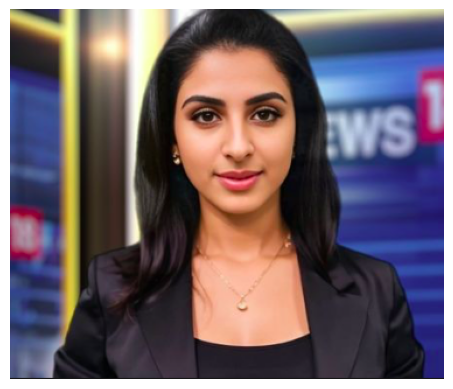

In [25]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('/content/img.png', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
# default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('/content/img.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('/content/img.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

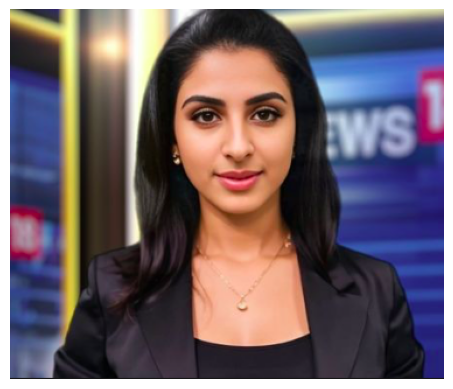

In [27]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('/content/img.png', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
# default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('/content/img.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('/content/img.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

In [29]:
from moviepy.editor import VideoFileClip

# Load the MP4 video file
video_path = '/content/ffinal1.mp4'
video_clip = VideoFileClip(video_path)

# Extract the audio
audio_clip = video_clip.audio

# Define the output WAV file path
output_wav_path = 'output_audio.wav'

# Save the audio as a WAV file
audio_clip.write_audiofile(output_wav_path, codec="pcm_s16le")

# Close the video and audio clips
video_clip.close()
audio_clip.close()


MoviePy - Writing audio in output_audio.wav


MoviePy - Done.


In [31]:
# selected audio from exmaple/driven_audio
img = '/content/img.png'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio ./output_audio.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full

/content/img.png
using safetensor as default
3DMM Extraction for source image
libpng warning: iCCP: extra compressed data
landmark Det:: 100% 1/1 [00:00<00:00, 15.43it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 23.86it/s]
mel:: 100% 1095/1095 [00:00<00:00, 39708.14it/s]
audio2exp:: 100% 110/110 [00:00<00:00, 357.10it/s]
Face Renderer:: 100% 548/548 [05:21<00:00,  1.70it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 252) to (256, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named ./results/2023_12_14_15.01.29/img##output_audio.mp4
libpng warning: iCCP: extra compressed data
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
sea

In [32]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


Display animation: ./results/2023_12_14_15.01.29.mp4


In [33]:

from moviepy.editor import VideoFileClip

# Input and output file paths
input_video_file = "/content/SadTalker/results/2023_12_14_15.01.29.mp4"
output_video_file = "output_no_audio.mp4"

# Load the video clip
video_clip = VideoFileClip(input_video_file)

# Set the audio to None to remove it
video_clip = video_clip.set_audio(None)

# Write the video clip without audio
video_clip.write_videofile(output_video_file, codec="libx264")

print(f"Audio removed: {input_video_file} -> {output_video_file}")


Moviepy - Building video output_no_audio.mp4.
Moviepy - Writing video output_no_audio.mp4



Moviepy - Done !
Moviepy - video ready output_no_audio.mp4
Audio removed: /content/SadTalker/results/2023_12_14_15.01.29.mp4 -> output_no_audio.mp4


In [ ]:
from moviepy.editor import *
clip2=VideoFileClip('/content/output.mp4')
clip1=VideoFileClip('output_no_audio.mp4')
fc=clips_array([[clip1,clip2]])
fc.write_videofile("/content/result1.mp4")

In [41]:
fc.write_videofile("/content/result1.mp4")


t: 100%|█████████▉| 1095/1096 [00:55<00:00, 23.96it/s, now=None]


t:  24%|██▍       | 265/1096 [04:05<00:55, 14.91it/s, now=None]



t:  24%|██▍       | 265/1096 [04:05<00:55, 14.91it/s, now=None]

t:  12%|█▏        | 131/1096 [01:11<01:01, 15.59it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/result1.mp4
